# Step by Step guide on How to plot np chart.

NP chart is a control chart for attribute data(discrete) use to control number for nonconforming items in successive subgroups, NP chart is plotted instead of P chart when the Sample Size(n) varies.

*****Example: Assume that control charts are to be established to monitor the non conforming cans of Orange juice of different sample sizes.*****

Since we have different sample sizes, then we can make use of np chart.

In [1]:
#Importing required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Let's generate a random sample of 30 observations, we're assuming that the sample size varies.

In [2]:
#creating an empty list
no_of_nonconform = []
#creating an empty list 
sample_num = []
#Sample sizes
n = []
count = 1
for i in range(0,30):
    no_of_nonconform.append(random.randint(2,22))
    sample_num.append(count)
    count+=1
    n.append(random.randint(40,50))
#Creating the dataframe
df = pd.DataFrame({'sample_num' : sample_num,'sample_size': n,'no_of_nonconform':no_of_nonconform})
df

,sample_num,sample_size,no_of_nonconform
0,1,47,21
1,2,47,22
2,3,47,12
3,4,44,6
4,5,49,20
5,6,42,20
6,7,49,22
7,8,50,11
8,9,44,6
9,10,49,14


### Next, is that we need to find the p_bar
p_bar = X1 + X2 + X3 + ... + Xm / m * (n1 + n2 + ... + nm)


where:

    Xi = number of Non Conforming items in each Sample number.
    
    ni = Is the sum of all the sample sizes.
    
    m is the total Sample number.
  

In [3]:
#Calculating p_bar
p_bar = df['no_of_nonconform'].sum() / (df.shape[0] * df['sample_size'].sum())
print(p_bar)

0.01010689990281827


## The Control limits for p chart is calculated as follows:

UCL = n * p_bar + 3sigma

LCL = n * p_bar - 3sigma

CL = p_bar

where sigma = squareroot(n * p_bar * q_bar)

q = 1 - p_bar

n = sample size

In [4]:
n = df['sample_size'].sum()

In [5]:
UCL = (n * p_bar) + (3* np.sqrt(n * p_bar * (1-p_bar)))
LCL = (n * p_bar) - (3* np.sqrt(n * p_bar * (1-p_bar)))
CL = n * p_bar
print('UCL is:',UCL)
print('LCL is:',LCL)
print('CL is:',CL)

UCL is: 24.98146126180554
LCL is: 2.751872071527796
CL is: 13.866666666666667


### Note: If the value of the LCL is negative, then use 0 as LCL

### Now, we want to plot the sample numbers against the Number of Non Conforming(X) values.

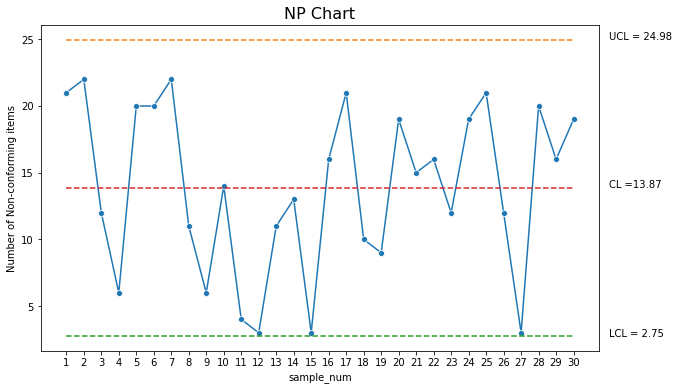

In [6]:
plt.figure(figsize = [10,6])
sns.lineplot(data = df, x = 'sample_num', y = 'no_of_nonconform', marker = 'o')
sns.lineplot(data = df, x = 'sample_num', y = UCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_num', y =  LCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_num', y = CL,linestyle = 'dashed')
plt.text(df.sample_num.max() + 2,LCL, 'LCL = ' + str(round(LCL,2)))
plt.text(df.sample_num.max() + 2,UCL,'UCL = ' + str(round(UCL,2)))
plt.text(df.sample_num.max() + 2,CL,'CL =' + str(round(CL,2)))
plt.title('NP Chart',fontsize = 16);
plt.xticks(range(min(df['sample_num']),max(df['sample_num'])+1));
plt.ylabel('Number of Non-conforming items')
plt.show()